In [1]:
#Import Libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# Importing the dataset
df = pd.read_csv('E:/Research--Thesis/Data Set/strokeDataNoMissingValueUpdated.csv')

In [33]:
df.head()

,Gender,Age,Work Type,Residence Area,Married,Hyper Tension,Heart Disease,Smoking,Average Glucose Level,Weight(Kg),...,Serum Cholesterol,LDL,HDL,Triglyceried,HbA1c,Hb,RBC,WBC,ESR,Brain Stroke
0,1,85,3,1,1,1,0,0,8.0,62,...,158,90,48,98,8.863526,12.80,4.260000,12.00,20,1
1,1,85,4,0,1,1,0,0,7.0,55,...,167,108,44,101,8.863526,12.70,4.400000,10.85,9,1
2,1,65,5,0,1,1,0,0,5.0,50,...,167,108,44,106,8.863526,11.91,4.300000,4.00,6,1
3,1,55,1,0,1,1,0,0,5.2,70,...,141,73,47,104,10.200000,13.90,4.902467,20.00,35,1
4,1,65,1,1,1,1,1,0,7.1,50,...,156,81,40,169,8.863526,13.80,5.150000,9.00,13,1


In [34]:
#separate data and brain stroke
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [35]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
#Split train test data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = 42)  

In [37]:
#Check number of brain stroke (yes) and brain stroke (no)  in the train data
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 112, 1: 157}

In [38]:
#Check number of brain stroke (yes) and brain stroke (no)  in the test data
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 39, 1: 77}

In [39]:
# Apply the random under-sampling for train dataset ( balance of train data)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True, random_state = 42)
X_train, y_train, idx_resampled = rus.fit_sample(X_train, y_train)

In [40]:
# Apply the random under-sampling for testing dataset (balance of test data)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True, random_state = 42)
X_test, y_test, idx_resampled = rus.fit_sample(X_test, y_test)

In [41]:
#Check number of brain stroke (yes) and brain stroke (no)  in the train data
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 112, 1: 112}

In [42]:
#Normalize the train dataset
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)

In [43]:
#Normalized the test dataset
X_test = min_max_scaler.transform(X_test)

In [37]:
#Apply grid search approch to find best parameter with 10 fold cross varidation
# cv=10 (10 fold cross validation) n_jobs = -1 (use max resource:paralization)
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(n_jobs=-1) 
param_grid = { 
           'bootstrap': [True, False],
           'max_depth': [10, 20, 30, 40, None],
           'max_features': ['auto', 'sqrt'],
           'min_samples_leaf': [1, 2, 4],
           'min_samples_split': [2, 5, 10],
           'n_estimators': [50 , 100]}

CV_rfc = GridSearchCV(estimator=clf, param_grid = param_grid, cv= 10, n_jobs = -1)
CV_rfc.fit(X_train, y_train)
#Get best parameters
best_param=CV_rfc.best_params_
print(CV_rfc.best_params_)

C:\Users\Tipu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [44]:
#Train the classifier with the best parameter return by grid Search
clf = RandomForestClassifier(n_estimators= 50, max_features= 'sqrt', max_depth = 10, min_samples_leaf=4, min_samples_split=10,n_jobs = -1, random_state =42)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [15]:
#Get feature importances from RandomForestClassifier
importances = list(clf.feature_importances_)
#Drop colums which are not used as features
df_drop=df.drop(['Brain Stroke'], axis=1)
#Get list of features from modified data frame
feature_list = list(df_drop.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [16]:
#Filter Non importances features
res = [n for n in feature_importances if not 0.0 in n]

#Sort the feature importances by most important first
feature_importances = sorted(res, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Hyper Tension        Importance: 0.41
Variable: LDL                  Importance: 0.1
Variable: HDL                  Importance: 0.08
Variable: RBS                  Importance: 0.06
Variable: Triglyceried         Importance: 0.06
Variable: Heart Disease        Importance: 0.05
Variable: RBC                  Importance: 0.03
Variable: Age                  Importance: 0.02
Variable: Average Glucose Level Importance: 0.02
Variable: BMI                  Importance: 0.02
Variable: Serum Cholesterol    Importance: 0.02
Variable: HbA1c                Importance: 0.02
Variable: Hb                   Importance: 0.02
Variable: WBC                  Importance: 0.02
Variable: Work Type            Importance: 0.01
Variable: Smoking              Importance: 0.01
Variable: Weight(Kg)           Importance: 0.01
Variable: Height(m)            Importance: 0.01
Variable: Serum Creatine       Importance: 0.01
Variable: ESR                  Importance: 0.01


In [17]:
#Separate x and y values for barplot
x = [x[0] for x in feature_importances]
y = [y[1] for y in feature_importances]

Text(0.5, 1.0, 'Features Importance')

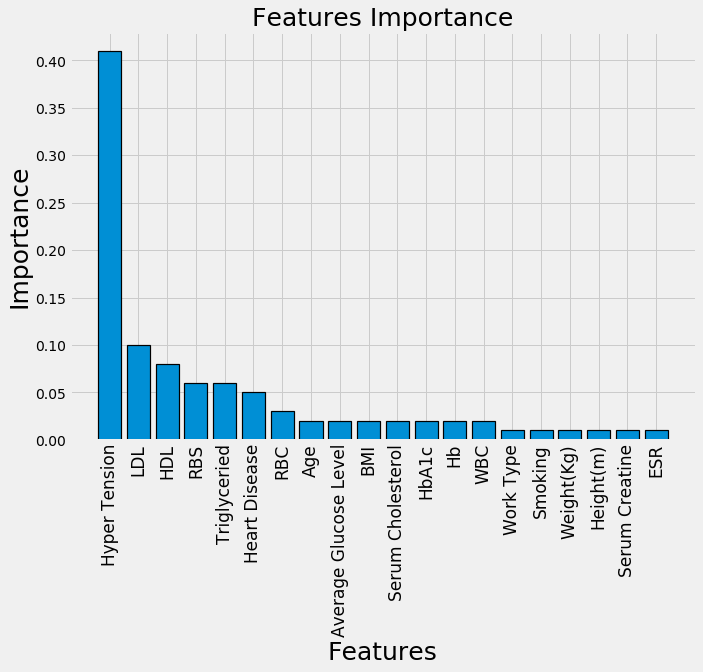

In [18]:
# Reset style 
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(10,7))
# list of x locations for plotting
x_values = list(range(len(y)))

# Make a bar chart
plt.bar(x_values, y, orientation = 'vertical', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, x, rotation='vertical', fontsize = 17)

# Axis labels and title
plt.ylabel('Importance', fontsize = 25); 
plt.xlabel('Features',fontsize = 25)
plt.title('Features Importance', fontsize = 25)
#fig.savefig("D:/CSV FILES/Feature Importances/Random Forest/RF 2-4-8-16/RF 2-4-8-16/Ob4.png")

In [19]:
#Prediction on test data
y_pred = clf.predict(X_test)
#Calculate accuracy
from sklearn import metrics
print("Accuracy %0.2f" % (100*metrics.accuracy_score(y_test, y_pred)))

Accuracy 94.87


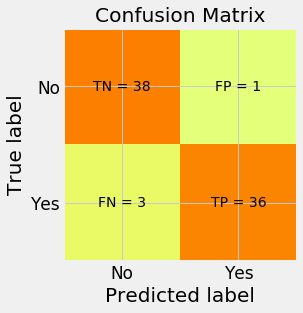

In [20]:
#Draw a confusion matrix
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix 
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No','Yes']
plt.title('Confusion Matrix',)
plt.ylabel('True label', fontsize =20)
plt.xlabel('Predicted label' , fontsize =20)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0, fontsize = 17)
plt.yticks(tick_marks, classNames, fontsize = 17)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), horizontalalignment='center',verticalalignment='center' )

In [21]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        39
           1       0.97      0.92      0.95        39

   micro avg       0.95      0.95      0.95        78
   macro avg       0.95      0.95      0.95        78
weighted avg       0.95      0.95      0.95        78



In [22]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc=metrics.auc(fpr, tpr)

In [23]:
#Define a function for plotting ROC
def plotRoc(fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr, label="Random Forest (AUC: {})".format(round(auc,2)))
    plt.plot([0,1], [0, 1], "r--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate", fontsize = 23)
    plt.ylabel("True Positive Rate", fontsize = 23)
    plt.title("Reciever Operating Characterstic",fontsize = 23)
    plt.legend(loc="lower right", fontsize = 15)
    plt.show()

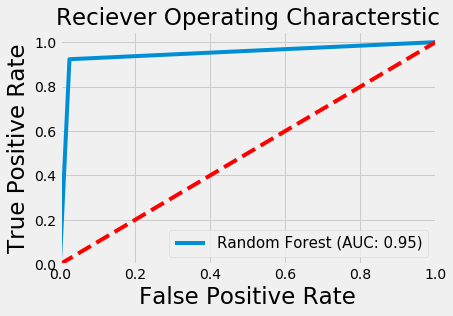

In [24]:
#Draw ROC curve
plotRoc(fpr,tpr)